
# Kierros 3 - Usean kubitin kvanttisysteemi

Palautus KE 22.3.2023 klo 16.15.

$$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Sisältö

- Kolmen kubitin piiri, tasainen todennäköisyys, lomittumattomuus
- Tensoritulo ja lomittuminen
- CNOT-portti ja Bellin tilat
- Porttien laskenta matriiseilla
- Usean kubitin järjestelmä matriiseilla
- SWAP-portti
- CZ-portti lyhyesti
- Käänteismatriisit ja unitaarisuus
- Ekstraboksi: mittaus projektiomatriisina

## Usean kubitin piiri

Tähän mennessä olemme käsitelleet ainoastaan yksittäisen kubitin operaattoreita ja piirejä. Seuraavaksi tutustumme usean kubitin järjestelmiin ja kvanttipiireihin.

<img src="./images/bell.png" height="256px">

## Usean kubitin kantatilat

Yhden kubitin laskennalliset kantatilat ovat $\ket 0$ ja $\ket 1$. Usean kubitin järjestelmän laskennalliset kantatilat voidaan esittää _bittijonona_. Bittijono koostuu biteistä, eli merkeistä `0` ja `1`. Bittijonon pituus kertoo kuinka monen kubitin systeemi on kyseessä.

Kahden kubitin laskennalliset kantatilat vastaavat kaikkia kahden pitkiä bittijonoja ketin sisällä:

$$
\ket{00} \\
\ket{01} \\
\ket{10} \\
\ket{11}
$$

Koska kantatilojen tulee muodostaa ortonormaali kanta, voimme päätellä, että neljä kantavektoria virittävät neliulotteisen vektoriavaruuden. Kuinka monta ulottuvuutta on 3 kubitin tilavektorien vektoriavaruudessa?

$N$ pituisia bittijonoja on $2^N$ erilaista, joten 3 kubitin kantatiloja on 8. Kantatilojen lukumääriä eli vektoriavaruuksien ulottuvuuksia voidaan lukea seuraavasta taulukosta. 

$$
\begin{array}{rl}
\text{Kubittien määrä} & \text{Avaruuden ulottuvuus} \\
\hline
1 & 2 \\
2 & 4 \\
3 & 8 \\
4 & 16 \\
25 & 33554432 \\
100 & 1267650600228229401496703205376
\end{array}
$$

Yhden kubitin lisääminen siis tuplaa vektoriavaruuden ulottuvuuden.

### Usean kubitin kantavektorit

Kahden kubitin kantatilat ovat vektoriesityksiltään seuraavat:

$$
\begin{array}{cccc}
\ket{00}=\begin{pmatrix}1 \\ 0 \\ 0 \\0\end{pmatrix} &
\ket{01}=\begin{pmatrix}0 \\ 1 \\ 0 \\0\end{pmatrix} &
\ket{10}=\begin{pmatrix}0 \\ 0 \\ 1 \\0\end{pmatrix} &
\ket{11}=\begin{pmatrix}0 \\ 0 \\ 0 \\1\end{pmatrix}
\end{array}
$$

On syytä huomata, että $\ket 0 \ne \ket{00}$, koska niiden ulottuvuudet ovat erisuuret. Opimme kohta, miten usean kubitin tilavektori voidaan muodostaa yksittäisten kubittien tilavektoreista _tensoritulolla_.

## Mittaus usean kubitin piirissä

Kuten edellisellä kierroksella opimme, todennäköisyys, jolla kubitti $\ket \psi$ havaitaan tilassa $\ket x$ on:

$$
P(\ket x) = \left|\braket{x | \psi}\right|^2
$$

Sama kaava toimii usean kubitin tilavektoreilla. Esimerkiksi todennäköisyys havaita tila $\ket{00}$ tilassa $\ket{01}$ on

$$
\begin{array}{rlllll}
P(\ket{01}) &=& \left|\braket{00 | 01}\right|^2 \\
&=& \left|\begin{pmatrix}1 & 0 & 0 & 0\end{pmatrix}\begin{pmatrix}0 \\ 1 \\ 0 \\ 0\end{pmatrix}\right|^2 \\
&=& 0
\end{array}
$$

Sama tulos saataisiin laskemalla yksittäisten todennäköisyyksien tulo, joka vastaa todennäköisyyttä että toisistaan riippumattomat tapahtumat tapahtuvat. Kutsutaan ensimmäistä kubittia systeemiksi $A$ ja toista kubittia systeemiksi $B$. Molemmat systeemit ovat tilassa $\ket 0$. Todennäköisyys siis havaita yhdistelmäjärjestelmä $AB$ tilassa $\ket{01}$ on:

$$
\begin{array}{rlllll}
P_{AB}(\ket{01}) &=& P_A(\ket 0) \cdot P_B(\ket 1) \\
&=& 1 \cdot 0
\end{array}
$$

Tätä kaavaa ei voi käyttää jos järjestelmät olisivat toisistaan riippuvia eli lomittuneita, koska yksittäisiä kubitteja ei voi enää esittää tilavektoreilla. Tämä on tärkeä ero klassisen ja kvanttimekaniikan välillä.

TODO linkki tehtävään

### Klassinen rekisteri

Kvanttipiirissä suoritetut mittaukset tallennetaan aina _klassiseen rekisteriin_. Klassinen rekisteri piirretään kahdella rinnakkaisella viivalla. Klassiseen rekisteriin yleensä varataan tilaa yhtä monelle bitille kuin piirissä on mittauksia.

Klassisen rekisterin koko näkyy sen alkupäässä. Esimerkiksi 3 bitin klassinen rekisteri näyttää seuraavalta:

![creg](./images/creg.png)

Kuten opimme 2. kierroksella, voimme määrätä klassisen rekisterin koon samalla kun luomme kvanttipiirin Qiskitillä:

```python
circuit = QuantumCircuit(3, 3) # 3 kubittia, 3 bitin klassinen rekisteri
```

Voimme lisätä mittaukset piiriin kaikille kubiteille käyttämällä metodia `measure_all()`:

```python
# kvanttipiirin lopuksi
circuit.measure_all(add_bits=False)
```

Mittaustulos tallennetaan klassisen rekisterin bittijonoon oikealta vasemmalle, eli klassisen rekisterin indeksi `0` vastaa viimeistä bittijonon bittiä:

<img src="./images/measreg.png" height="384px">

> Argumentti `add_bits=False` käyttää aikaisemmin luotua klassista rekisteriä. Muuten `measure_all` loisi uuden klassisen rekisterin. Huomaa myös, että `measure_all` lisää harmaan visuaalisen erottimen ennen mittauksia.

Seuraavassa kvanttipiirissä on kolme kubittia, jotka kaikki pyöritetään $\ket +$ tilaan Hadamard-porteilla. Intuition mukaan kyseisen piirin kubittien mittaukset ovat toisistaan riippumattomat tapahtumat, koska kubitit eivät vuorovaikuta keskenään — piirissä ei siis esiinny **lomittumista**. Miltä näyttäisi mittaustulosten todennäköisyysjakauma?

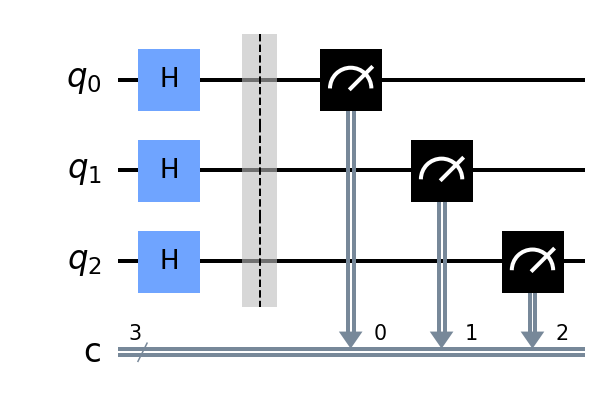

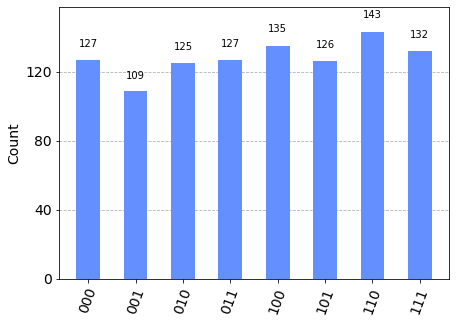

In [9]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

circuit = QuantumCircuit(3, 3) # 3 kubittia, 3 bitin klassinen rekisteri

circuit.h([0, 1, 2]) # operoidaan Hadamardilla kaikkiin kubitteihin

circuit.measure_all(add_bits=False)
display(circuit.draw(output='mpl', scale=2))

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

Yllä olevan koodin piirtämät mittaustulokset muodostavat tasaisen todennäköisyysjakauman (laskennallisessa mittauskannassa). Jokainen pylväs vastaa eri kollektiivista mittaustulosta. Mittaustulos `100` tarkoittaa, että kubitti $q_2$ (alin) havaittiin tilassa $\ket 1$ ja muut tilassa $\ket 0$.

Voimme myös huomata, että yhden kubitin mittauksesta ei voi päätellä toisten kubittien mittaustuloksista (tai ylipäätään kubittien tilasta) mitään.

<img src="./images/results1.png" height="512px">
<img src="./images/results2.png" height="512px">

Kuvassa näkee, että kubitin $q_2$ mittauksesta saatu tulos ei vaikuta kubittien $q_0$ ja $q_1$ mittaustuloksiin, vaan todennäköisyysjakaumat ovat samat (vaihtelu johtuu satunnaisuuskohinasta).


TODO +++ tilan mittauslaskuja

## Tensoritulo

In [10]:
import matplotlib.pyplot as plt
# jos käytät vscodea ja tarvitset pimeän väriteeman niin poista # kommenttimerkki
# plt.style.use('dark_background')

<details>
<summary>Mittaus projektiomatriiseilla</summary>

$$
\psi \quad {\overset {a_{n}}{\Longrightarrow }}\quad {\frac {P_{n}\ket \psi }{\sqrt {\braket{\psi | P_{n} | \psi}}}}
$$
</details>